<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/unluckid/model/blob/main/tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 설정

In [68]:
import gdown
import numpy as np
import cv2
import numpy as np
import os
import shutil


file_id = '1jkAAF7VwsXaBh2DgTkP5w9icS1FfutOR'
file_id1 = '1oPazCje0mkB101pzkY1ySCW6g750-KRK'
file_id2 = '181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu'
file_id3 = '1SD6KOtWgzp2uQHrFupVak89k0cg3bdla'
download_url = f'https://drive.google.com/uc?id={file_id}'
download_url1 = f'https://drive.google.com/uc?id={file_id1}'
download_url2 = f'https://drive.google.com/uc?id={file_id2}'
download_url3= f'https://drive.google.com/uc?id={file_id3}'
# 다운로드 시작


gdown.download(download_url, '/content/inceptionV3.keras', quiet=False)
gdown.download(download_url1, '/content/vgg16.keras', quiet=False)
gdown.download(download_url2, '/content/video.zip', quiet=False)
gdown.download(download_url3, '/content/vgg161.keras', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1jkAAF7VwsXaBh2DgTkP5w9icS1FfutOR
From (redirected): https://drive.google.com/uc?id=1jkAAF7VwsXaBh2DgTkP5w9icS1FfutOR&confirm=t&uuid=c0fe99c0-f547-4e92-9a6a-a92f4ebc1d03
To: /content/inceptionV3.keras
100%|██████████| 403M/403M [00:08<00:00, 48.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oPazCje0mkB101pzkY1ySCW6g750-KRK
From (redirected): https://drive.google.com/uc?id=1oPazCje0mkB101pzkY1ySCW6g750-KRK&confirm=t&uuid=d250358c-d829-453a-a09a-8f1ad76ec49a
To: /content/vgg16.keras
100%|██████████| 301M/301M [00:01<00:00, 211MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu
From (redirected): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu&confirm=t&uuid=5dd3c6cb-a91c-4d6c-997a-c4324ef4e097
To: /content/video.zip
100%|██████████| 1.65G/1.65G [00:24<00:00, 66.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1SD6K

'/content/vgg161.keras'

In [16]:
import zipfile


zip_file_path = '/content/video.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"압축이 {extract_path}에 해제되었습니다.")

압축이 /content/에 해제되었습니다.


In [6]:
os.makedirs("train/", exist_ok=True)
os.makedirs("val/", exist_ok=True)

In [7]:
class Image_propressing:
    def __init__(self):
        #  폴더 경로
        self.video_path = "video/"  # 비디오 폴더
        self.nature_img_folder_path = "nature/"  # 전처리 이전 폴더
        self.model1_img_folder_path = "model1/"  # 기본 모델 폴더
        self.model2_img_folder_path = "model2/"  # 캐니 모델 폴더
        self.train_path = "train/"
        self.val_path = "val/"
        self.data = []  # 전처리 전 데이터셋

        self.label = ["_ari", "_smallthe", "_corki", "_velkoz", "_thresh", "_gragas", "_atrox", "_kogmaw", "_8", "_9"]  # 10개의 이미지 폴더에 대한 값
        self.model_data1 = []  # 기본 이미지 모델 데이터셋
        self.model_data2 = []  # 캐니 이미지 모델 데이터셋
        self.valimgs = []    # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.trainimgs = []  # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.train_save = 3
        self.val_save = 11
    def reset_folder(self):
        shutil.rmtree(self.train_path)
        shutil.rmtree(self.val_path)
        print("폴더 초기화")
    def set_folder(self):
        os.makedirs(self.video_path, exist_ok=True)
        os.makedirs(self.train_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model2_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model2_img_folder_path, exist_ok=True)
        for label in self.label:                   # 10개의 하위 폴더 생성 코드 추가 작성
            os.makedirs(self.video_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model2_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model2_img_folder_path + label, exist_ok=True)
        print("setting folder")

    def save_train(self):
        for label in self.label:
            for file_name in os.listdir(self.video_path + label):
                file_path = os.path.join(self.video_path + label, file_name)
                video_capture = cv2.VideoCapture(file_path) # 동영상 로드
                if not video_capture.isOpened():
                    print("error_00: " + label + ": 동영상 없음 ")
                frame_count, train_count, val_count = 0, 0, 0
                fps = video_capture.get(cv2.CAP_PROP_FPS)  # fps 설정
                train_save = int(fps * self.train_save/10)  # 훈련에 사용될 이미지 정리  3초 간격으로 작성
                val_save = int(fps * self.val_save/10)   # 훈련에 사용될 이미지 정리  11초 간격으로 작성
                while True:
                    ret, frame = video_capture.read()
                    if not ret:
                        break  # 프레임이 더 이상 없으면 반복문 종료
                    # 프레임 파일 이름 형식 지정 및 저장
                    if frame_count % train_save == 0:
                        frame_filename = os.path.join(self.train_path + self.nature_img_folder_path + label, f"{file_name}_{train_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        train_count += 1
                    elif frame_count % val_save == 0:  # elif 이미지 중복 제거
                        frame_filename = os.path.join(self.val_path + self.nature_img_folder_path + label, f"{file_name}_{val_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        val_count += 1
                    frame_count += 1
                    # 자원 해제
                video_capture.release()

    # 이미지의 폴더 패스를 받고 이를 self.imgs 에 저장한다.
    def set_img(self, model): #이미지 이름을 모두 따서 self.imgs에 저장해둠
        self.valimgs = []
        self.trainimgs = []
        for label in self.label:
            for img in os.listdir(self.val_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.valimgs.append([self.val_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
        for label in self.label:
            for img in os.listdir(self.train_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.trainimgs.append([self.train_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
    """
    # 이미지 로테이트 함수
    def made_model1_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.val_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        for path in self.trainimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.train_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        # return self.model_data1    # data리스트 반환
      """
    def made_model2_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0] + path[1] + path[2]+"/"+path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0]+self.model2_img_folder_path+path[2]+"/"+path[3], img_c)
        for path in self.trainimgs:
            image = cv2.imread(path[0] + path[1] + path[2] + "/" + path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0] + self.model2_img_folder_path + path[2]+"/" + path[3], img_c)
        print("생성 완료")

In [17]:
IMGP = Image_propressing()
IMGP.reset_folder()  # 폴더 초기화
IMGP.set_folder()
IMGP.save_train()
#IMGP.made_model1_dataset() # 로테이트 이미지 생성자 사용 안함
#IMGP.made_model2_dataset() # canny이미지 생성자 사용 안함
"""
IMGP.train_path = "train1/"
IMGP.val_path = "val1/"
IMGP.train_save = 4
IMGP.val_save = 13
IMGP.set_folder()
IMGP.save_train()
IMGP.made_model1_dataset()
IMGP.made_model2_dataset()
"""

폴더 초기화
setting folder
error_00: _ari: 동영상 없음 
error_00: _smallthe: 동영상 없음 


'\nIMGP.train_path = "train1/"\nIMGP.val_path = "val1/"\nIMGP.train_save = 4\nIMGP.val_save = 13\nIMGP.set_folder()\nIMGP.save_train()\nIMGP.made_model1_dataset()\nIMGP.made_model2_dataset()\n'

In [ ]:
train_dir = "train/nature"
val_dir = "val/nature"
# 데이터 증강 (학습 데이터에만 적용)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,       # 회전 범위 증가
)

# 검증 데이터는 증강하지 않음 (단순히 정규화만 적용)
val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습 데이터 경로
    target_size=(224, 224),  # VGG16의 입력 크기에 맞게 리사이즈
    batch_size=32,
    class_mode='categorical',  # 다중 클래스 분류
    shuffle=True
)

# 검증 데이터 생성기
val_generator = val_datagen.flow_from_directory(
    val_dir,  # 검증 데이터 경로
    target_size=(224, 224),  # VGG16의 입력 크기에 맞게 리사이즈
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

# tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 10), dtype=tf.float32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 10), dtype=tf.float32)
    )
)
train_dataset = train_dataset.repeat()  # 학습 데이터 무한 반복
val_dataset = val_dataset.repeat()      # 검증 데이터 무한 반복


In [3]:
model_path1 = '/content/vgg161.keras'
model_path2 = '/content/inceptionV3.keras'
# 모델 불러오기
model1 = load_model(model_path1)
model2 = load_model(model_path2)
# 모델 구조 확인
model1.summary()
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 177,745,312 (678.04 MB)

 Trainable params: 51,385,866 (196.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 102,771,734 (392.04 MB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 100,462,912 (383.24 MB)

 Trainable params: 26,220,042 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 52,440,086 (200.04 MB)

In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from tensorflow.keras.applications import VGG16, Xception , InceptionV3
from tensorflow.keras.models import load_model, Model
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step
y_true: 852, y_scores: 852


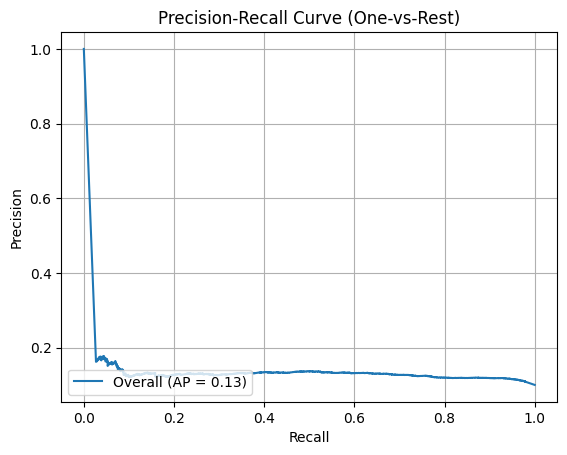

In [19]:
y_true = val_generator.classes  # 실제 클래스 라벨

# 예측 확률 계산 (전체 검증 데이터에 대해 예측)
y_scores = model2.predict(val_generator)

# y_true와 y_scores의 길이 확인
print(f"y_true: {len(y_true)}, y_scores: {y_scores.shape[0]}")

# 각 클래스를 하나로 통합하여 One-vs-Rest 방식으로 precision-recall curve 계산
# 각 샘플에 대해 가장 높은 예측 확률을 갖는 클래스 선택
y_true_one_hot = np.zeros_like(y_scores)
y_true_one_hot[np.arange(len(y_true)), y_true] = 1  # 실제 클래스 라벨을 One-hot 형식으로 변환

# precision-recall curve 계산
precision, recall, _ = precision_recall_curve(y_true_one_hot.ravel(), y_scores.ravel())

# 평균 정밀도 (Average Precision) 계산
average_precision = average_precision_score(y_true_one_hot.ravel(), y_scores.ravel())

# Precision-Recall Curve 그리기
plt.plot(recall, precision, label=f'Overall (AP = {average_precision:.2f})')

# 그래프 설정
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
 #모델 1의 정확도 계산
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score
actual_labels =  train_generator.classes
model1_predictions = model1.predict(train_generator)
model1_final_predictions = np.argmax(model1_predictions, axis=1)
model1_accuracy = accuracy_score(actual_labels, model1_final_predictions)
print(f"Model 1 Accuracy: {model1_accuracy:.4f}")

# 모델 2의 정확도 계산
model2_predictions = model2.predict(train_generator)
model2_final_predictions = np.argmax(model2_predictions, axis=1)
model2_accuracy = accuracy_score(actual_labels, model2_final_predictions)
print(f"Model 2 Accuracy: {model2_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 63s 409ms/step
Model 1 Accuracy: 0.2250
118/153 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step